In [2]:
# 이미지 분류

# 케라스 내장 데이터셋 로드

import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [3]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


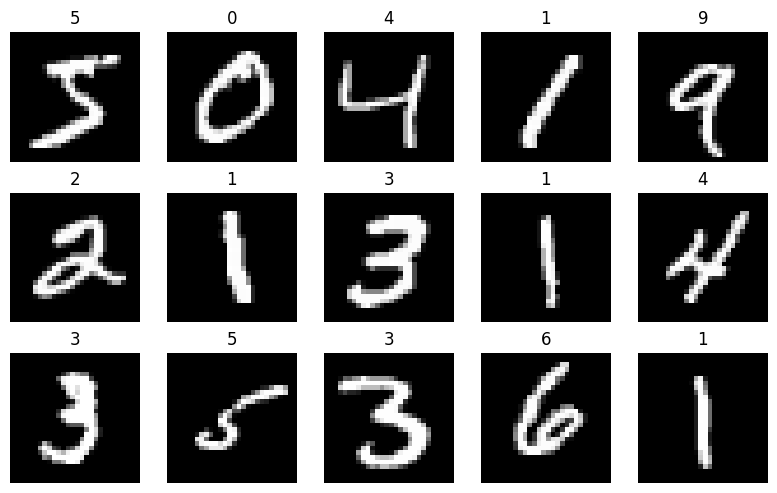

In [6]:
import matplotlib.pyplot as plt

#canvas 생성
fig,axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
    ax = axes[i//5, i%5]        # ax = axes[i// n_cols, i%n_cols]    n_cols는 열의 개수를 나타낸다.
    
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))
    
plt.tight_layout()
plt.show()

In [7]:
# 데이터 정규화하기 

print(f'정규화 전 : {x_train.min()},{x_train.max()}')

x_train = x_train/x_train.max()
print(f'정규화 후 : {x_train.min()}, {x_train.max()}')

정규화 전 : 0,255
정규화 후 : 0.0, 1.0


In [8]:
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [9]:
# flatten 레이어

print(f'변경 전 : {x_train.shape}')

#1차원 배열로 변경 

print(f'변경 후 : {tf.keras.layers.Flatten()(x_train).shape}')
x_train.reshape(60000,-1).shape

변경 전 : (60000, 28, 28)
변경 후 : (60000, 784)


(60000, 784)

In [10]:
# 활성화 함수

# 활성화 함수는 입력을 비선형 출력으로 변환해주는 함수이다.
# 비선형성을 추가하지 않고 선형함수로만 층을 구성하면 모델이 깊어도 결국은 선형함수로 표현됨

# 시그모이드, 탄젠트, 렐루, 리키렐루


# dense 레이어에 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')


# 별도로 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

In [24]:
# 입력과 출력

model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\user\miniconda3\envs\PythonEx\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# 출력층 활성화함수 

# 노드가 1개일때는 sigmoid  -> 이진분류
# 2개 이상일때는 softmax  -> 다중클래스 분류
# softmax : 입력 벡터를 확률분포로 변환한다.   각 노드의 출력값은 0과 1사이의 값 / 모든 노드의 출력값의 합은 1 

In [ ]:
# 분류모델 손실함수 

# 이진분류 : binary_crossentropy 0 또는 1로 반환
# 다중클래스 분류(원핫 인코딩) : categorical_crossentropy
# 다중클래스 분류(정수형 레이블) : sparse_categorical_crossentropy

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer='adam', loss= 'categorical_crossentropy')



In [19]:
#  옵티마이저 

# 손실을 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법 
# 가장 많이쓰는것은 adam

# sgd, adam, adagrad, nadam, rmsprop 등


# 클래스로 지정 

adam = tf.keras.optimizers.Adam()
model.compile(optimizer=adam)


# 문자열로 지정 

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy')

In [ ]:
# 평가지표 

# 분류 모델의 평가지표 : accuracy(acc), recall, precision

In [21]:
# 훈련

model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs = 10,batch_size=32, verbose=1)
# batch_size : 전체 데이터를 몇개로 나눴는지  -> 60000/32 = 1875

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0156 - val_loss: 19.4680
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0153 - val_loss: 19.6980
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0130 - val_loss: 20.1858
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0145 - val_loss: 26.9084
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0150 - val_loss: 27.7013
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0125 - val_loss: 25.4612
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0123 - val_loss: 26.8617
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0112 - val_loss: 24.6473
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0081 - val_loss: 25.6907
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0135 - val_loss: 25.4541


In [25]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [28]:
print(predictions[0])

import numpy as np
print(np.argmax(predictions[0])) # argmax : argmax(a, axis=None) -> a에서 axis=None에서 최대값의 index를 반환


[9.9789423e-01 1.4200662e-12 0.0000000e+00 2.3271768e-30 2.1057883e-03
 0.0000000e+00 0.0000000e+00 1.0493361e-24 5.9555365e-25 0.0000000e+00]
0
